## Classification

In this notebook we will see some basic classification methods:
- Logistic regression
- Support vector machine
- Decision tree
- Random forest


We will use the following libraries:
- `sklearn` 
- `scipy`
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`



In [21]:
from sklearn import datasets
from sklearn import linear_model, svm, tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline




## The breast cancer data
 

In [2]:
# Load dataset
data = datasets.load_breast_cancer()
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

With this dataset, we will try to classify the  tumor as begnin or malignant, the target variable

In [3]:
cancer_x=pd.DataFrame(data['data'],columns=data.feature_names) #these will be x in our model
cancer_y=data.target # these will be y in our model

In [4]:
cancer=pd.DataFrame(data['data'],columns=data.feature_names)
cancer["cancer10"]=data.target   # save cancer as another column in the dataset with 0 and 1
cancer["cancer10"]=data.target_names[data.target]   # save cancer as another column in the dataset with begnin or malignant
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer10
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [5]:
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


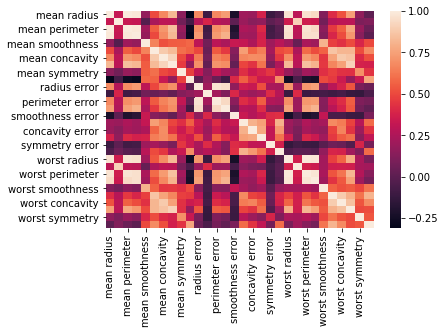

In [6]:
sns.heatmap(cancer.corr())

Based on the result above, and some data exploration, describe some patterns in the breast dataset

## Classification

### Creating dataset

The first part is to create a training and test dataset, this can be done automatically with the `sklearn` library. we will set 20% of the data apart for training

In [7]:
train_x, test_x,train_y,test_y = train_test_split(cancer_x,cancer_y,test_size=0.20, random_state=40)

In [8]:
train_x.count()[0]

455

In [9]:
test_x.count()[0]

114

### Logistic regression



Logistic Regression is a type of Generalized Linear Model (GLM) that model a binary response variable $y$. Here $X$ is all the explanatory variables and $y$ is the tumor type.

1) Build the model with the `train` dataset

In [10]:
LR = linear_model.LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_x, train_y)  

2) Predict the classification with the test dataset 

In [11]:
LR.predict(test_x)  

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1])

3) Measure the accuracy of the prediction with this model on the test dataset

In [41]:
round(LR.score(train_x,train_y), 4) 

0.9451

In [12]:
LR.score(test_x,test_y)

0.9385964912280702

## Support Vector Machine

Support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 

They work very similarly to logistic regression:

1) Fit the model to the `train` dataset

In [13]:
SVM = svm.LinearSVC().fit(train_x, train_y)  

2) Predict the classification with the test dataset 

In [14]:
SVM.predict(test_x)  

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1])

3) Measure the accuracy of the prediction with this model on the test dataset

In [15]:
SVM.score(test_x,test_y)

0.9473684210526315

## Decision trees

Decision trees are model based on a tree structure with successive split from an inferred set of variables. The `DecisionTreeClassifier` implements a CART algorithm.


In [16]:
clf= tree.DecisionTreeClassifier().fit(train_x,train_y)

In [33]:
clf.predict(test_x)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1])

In [34]:
clf.score(test_x,test_y)

0.9298245614035088

To plot the tree try: (there may be conflict in the libraries)

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## Random Forests

Random forest are methods for classification, regression and other tasks that operates by constructing a multitude of decision trees 

1) Build model

In [ ]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(train_x, train_y)  

2) Predict

In [ ]:
RF.predict(test_x) 

3) Measure accuracy

In [ ]:
RF.score(test_x,test_y)

## Comparison

For each model write the accuracy to compare them:
- logistic regression:
- SVM
- Decision tree
- Random forest